# ЕГЭ 2017 Вариант 6 &nbsp; &nbsp; &nbsp; EGE 2017 Variant 6
[ЕГЭ-2017. Информатика.10 тренировочных вариантов. Ушаков Д.М.](https://drive.google.com/file/d/0B6696ckkWj_zS2ptblAxNERHZzQ/view)

[Basic Regular Expressions in R Cheatsheet](https://www.rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf)

[DataFlair: R Tutorials](https://data-flair.training/blogs/category/r/)

[Алгоритм Шеннона — Фано](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D0%B5%D0%BD%D0%BD%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%B0%D0%BD%D0%BE)

[IPv4 - Address Classes](https://www.tutorialspoint.com/ipv4/ipv4_address_classes.htm)

[Basic and advanced network visualization with R](http://www.kateto.net/wp-content/uploads/2016/04/Sunbelt%202016%20R%20Network%20Visualization%20Handout.pdf)

In [2]:
library(IRdisplay)
library(repr)
library(hash)
library(numbers)
library(e1071)
library(igraph)
library(VennDiagram)

In [3]:
# install.packages("")

In [4]:
answer_dictionary <- hash()

In [87]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Roboto&effect=3d|fire-animation|canvas-print|brick-sign');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: gray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #348ABD; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre, div.output_subarea {color: gray;}
div.input_prompt {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: gray;}                        
</style>")

## Часть 1 &nbsp; &nbsp; &nbsp; Part 1
## 1.
Даны 4 целых числа, записанных различных системах счисления: $9F_{16}$, $10110110_2$, $274_8$, $CE_{16}$. 

Сколько среди них чисел, значение которых лежит между $A5_{16}$ и $CD_{16}$?

---

There are four integers written in different number systems: $9F_{16}$, $10110110_2$, $274_8$, $CE_{16}$.

How many of them have the value between $A5_{16}$ and $CD_{16}$?

In [6]:
options(scipen = 999)
oct2dec <- function(n) {
  return(sapply(strsplit(as.character(n),split=""), 
                function(x) sum(as.numeric(x) * 8 ** (rev(seq_along(x) - 1)))))
}
bin2dec <- function(n) {
  return(sapply(strsplit(as.character(n),split=""), 
                function(x) sum(as.numeric(x) * 2 ** (rev(seq_along(x) - 1)))))
}                

In [10]:
# A5_16 = 0xa5; CD_16 = 0xcd
borders <- as.integer(sprintf("%d", c(0xa5, 0xcd)))
borders

[1] 165 205

In [11]:
# 9F_16 = 0x9f; 10110110_2; 274_8; CE_16 = 0xce
numbers <- c(as.integer(sprintf("%d", 0x9f)), bin2dec('10110110'), 
             oct2dec('274'), as.integer(sprintf("%d", 0xce)))
numbers

[1] 159 182 188 206

In [16]:
(numbers > borders[1]) & (numbers < borders[2])

[1] FALSE  TRUE  TRUE FALSE

In [17]:
answer_dictionary[1] <- toString(sum((numbers > borders[1]) & (numbers < borders[2])))

## 2.
Дан фрагмент таблицы истинности выражения $F$. Значения в пустых клетках таблицы неизвестны и могут быть любыми из возможных.

---

A fragment of the truth table of the expression $ F $ is given. Values in blank cells are unknown and can be any of the possible ones.

| $x_1$ | $x_2$ | $x_3$ | $F$ |
|:-:|:-:|:-:|:-:|
|   | 1 | 1 | 1 |
| 0 |   | 0 | 0 |
| 1 | 1 |   | 1 |

Перечислите в порядке возрастания без запятых и пробелов номера логических выражений, которые могут соответствовать $F$:

---

List the numbers of logical expressions that can correspond to $ F $ in ascending order without commas and spaces:

1) $\neg x_1 \lor x_2 \lor \neg x_3$

2) $x_1 \land x_2 \land x_3$

3) $x_1 \land x_2 \land \neg x_3$

4) $x_1 \lor x_2 \lor x_3$

5) $x_1 \land x_2 \lor x_3$

In [79]:
F1 <- function(x1,x2,x3) {return (!x1 | x2 | !x3)}
F2 <- function(x1,x2,x3) {return (x1 & x2 & x3)}
F3 <- function(x1,x2,x3) {return (x1 & x2 & !x3)}
F4 <- function(x1,x2,x3) {return (x1 | x2 | x3)}
F5 <- function(x1,x2,x3) {return (x1 & x2 | x3)}

In [80]:
find_logic_exp <- function(f) {
    c <- 0
    
    if (f(1,1,1) == 1 & f(0,1,1) == 1) {
        c <- c + 1
    }
    if (f(0,1,0) == 0 & f(0,0,0) == 0) {
        c <- c + 1
    }
    if (f(1,1,0) == 1 & f(1,1,1) == 1) {
        c <- c + 1
    }

    if (c == 3) {
        return(TRUE)
    } else {
        return(FALSE)
    }
}

In [81]:
c <- 0
result <- ''

for (f in c(F1,F2,F3,F4,F5)) {
    c <- c + 1
    if (find_logic_exp(f) == TRUE) {
        result <- paste(result,toString(c),sep='')
    }
}
result

[1] "5"

In [82]:
answer_dictionary[2] <- result

## 3.
Между населёнными пунктами A, B, C, D, E, F построены дороги, протяжённость которых приведена в таблице. 

(Отсутствие числа в таблице означает, что прямой дороги между пунктами нет.)

Определите длину кратчайшего пути между пунктами А и F 

(при условии, что передвигаться можно только по построенным дорогам).

---

Between the settlements A, B, C, D, E, F roads are constructed, the length of them is given in the table. 

(The absence of a number in the table means that there is no direct road between these points.)

Determine the length of the shortest path between points A and F 

(on the condition that it is possible move only along the constructed roads).

| &#x123CF; | A | B | C | D | E | F |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **A** | &#x123CF; | 7 | 2 |   |   |   |
| **B** | 7 | &#x123CF; | 4 | 2 | 2 | 4 |
| **C** | 2 | 4 | &#x123CF; | 5 | 1 |   |
| **D** |   | 2 | 5 | &#x123CF; | 4 | 3 |
| **E** |   | 2 | 1 | 4 | &#x123CF; | 8 |
| **F** |   | 4 |   | 3 | 8 | &#x123CF; |

In [64]:
edges <- c('A','B', 'A','C', 'B','C', 'B','D', 'B','E', 'B','F',
           'C','D', 'C','E', 'D','E', 'D','F', 'E','F')
weights <- c(7,2,4,2,2,4,5,1,4,3,8)
g <- graph(edges, directed=FALSE)%>%
    set_edge_attr("weight", value=weights)

shortest_path <- get.shortest.paths(g,'A','F')

In [65]:
adjm <- get.adjacency(g, attr="weight",sparse=FALSE)
adjm[sort(rownames(adjm)),sort(colnames(adjm))]

,A,B,C,D,E,F
A,0,7,2,0,0,0
B,7,0,4,2,2,4
C,2,4,0,5,1,0
D,0,2,5,0,4,3
E,0,2,1,4,0,8
F,0,4,0,3,8,0


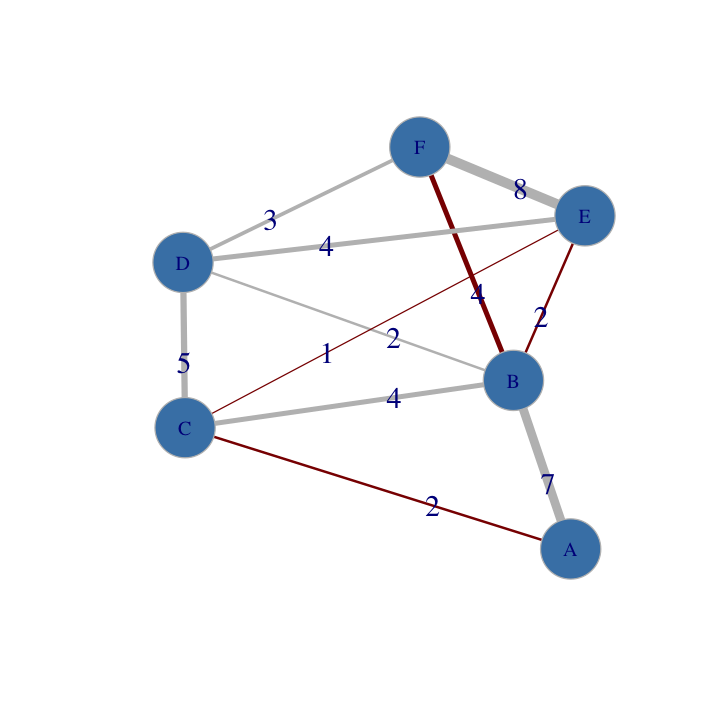

In [72]:
options(repr.plot.width=6,repr.plot.height=6)

E(g)$color <- "gray"
E(g, path=unlist(shortest_path$vpath))$color <- "darkred"

plot(g, layout=layout_nicely(g),
     vertex.color="steelblue",vertex.size=30,vertex.frame.color="gray",
     edge.label=E(g)$weight,edge.label.cex=1.5,edge.width=E(g)$weight)

In [76]:
shortest_path$vpath[[1]]

+ 5/6 vertices, named, from ec74e88:
[1] A C E B F

In [68]:
distances(g)

,A,B,C,D,E,F
A,0,5,2,7,3,9
B,5,0,3,2,2,4
C,2,3,0,5,1,7
D,7,2,5,0,4,3
E,3,2,1,4,0,6
F,9,4,7,3,6,0


In [70]:
answer_dictionary[3] <- distances(g,'A','F')

## 4.
В папке `D:\Pictures\School` находятся следующие файлы и только они:

`kino.gif`

`vano.jpg`

`ono.jpg`

`domino.gif`

`no.jpg`

К этим файлам применили следующую операцию: 

файлы, имена которых удовлетворяют маске `*?no.*g*` переместили в папку `".."` относительно текущей. 

Сколько файлов останется в исходной папке?

---

In the folder `D:\Pictures\School` there are only the following files:

`kino.gif`

`vano.jpg`

`ono.jpg`

`domino.gif`

`no.jpg`

The operation was applied to them: 

files which names satisfy the mask `*?no.*g*` were moved to the folder `".."` relatively to the current one.

How many files will remain in the source folder?

In [77]:
file_list <- c('kino.gif', 'vano.jpg', 'ono.jpg', 'domino.gif', 'no.jpg')

In [78]:
moved_files <- grepl("^.*.no\\..*g.*$", file_list)
moved_files

[1]  TRUE  TRUE  TRUE  TRUE FALSE

In [84]:
c <- length(file_list) - sum(moved_files)
c

[1] 1

In [85]:
answer_dictionary[4] <- toString(c)

## 5.
Для кодирования некоторой последовательности, состоящей из букв `A`, `B`, `C`, `D` и `E`, используется неравномерный двоичный код, позволяющий однозначно декодировать полученную двоичную последовательность. 

Вот этот код: <i style="font-size:130%;" class="font-effect-brick-sign">`A-111`, `B-101`, `C-100`, `D-01`, `E-110`</i>. 

Можно ли сократить для одной или нескольких букв длину кодового слова, удалив в нём один или несколько последних символов, чтобы код по-прежнему можно было декодировать однозначно?

Запишите ответ в виде: буква, кодовое слово. Например, если бы ответ был «Для буквы `F` новый код будет `110`», ответ нужно записать как: <i style="font-size:130%;" class="font-effect-brick-sign">`F110`</i>. Если невозможно ничего сократить, запишите в ответе просто цифру `0`.

---

To encode some sequence consisting of the letters `A`, ` B`,  `C`, ` D` and `E`, an unequal binary code is used, which uniquely decodes the resulting binary sequence.

Here is the code:  <i style="font-size:130%;" class="font-effect-brick-sign">`A-111`, `B-101`, `C-100`, `D-01`, `E-110`</i>.

Is it possible to shorten the length of a codeword for one or more letters by deleting one or more of the last characters in it so that the code can still be decoded uniquely?

Write down the answer in the form: a letter, a code word. For example, if the answer was "For the letter `F`, the new code will be `110`", it should be written as <i style="font-size:130%;" class="font-effect-brick-sign">`F110`</i>. If it is impossible to shorten anything, write down in the answer just the number `0`.

В решении использован Алгоритм Шеннона — Фано.

С `0` начинается только одно кодовое слово последовательности <i style="font-size:130%;" class="font-effect-brick-sign">`D-01`</i>. 

После сокращения на единицу эта буква будет кодироваться <i style="font-size:130%;" class="font-effect-brick-sign">`D-0`</i>, а вся последовательность по-прежнему декодируется однозначно. 

---

The solution uses the Shannon-Fano Algorithm.

In the sequence, only one codeword <i style="font-size:130%;" class="font-effect-brick-sign">`D-01`</i> begins with `0`.

After a reduction of one, this letter will be encoded <i style="font-size:130%;" class="font-effect-brick-sign">`D-0`</i>, and the entire sequence is still possible to decode uniquely.

In [88]:
answer_dictionary[5] <- 'D0'

## 6.
Автомат получает на вход два двузначных шестнадцатеричных числа. В этих числах все цифры не превосходят цифру 5 (если в числе есть цифра больше 5, автомат отказывается работать). По этим числам строится новое шестнадцатеричное число по следующим правилам.

$1.$ Вычисляются два шестнадцатеричных числа — произведение старших разрядов полученных чисел и произведение младших разрядов этих чисел.

$2.$ Полученные два шестнадцатеричных числа записываются друг за другом в порядке возрастания (без разделителей).

Пример: 

| Исходные числа | Цифры в разрядах | Поразрядные произведения | Результат |
|:-:|:-:|:-:|:-:|
| $52_{16}, 44_{16}$ | $5_{16}, 4_{16} = 5_{10}, 4_{10}$ <br> $2_{16}, 4_{16} = 2_{10}, 4_{10}$ |$20_{10} = 14_{16}$ <br> $8_{10} = 8_{16}$ | $814_{16}$ |

Какие из предложенных чисел могут быть результатом работы автомата?

Перечислите в алфавитном порядке буквы, соответствующие этим числам, без пробелов и знаков препинания.

---

The automatic system receives two two-digit hexadecimal numbers. In these numbers, all digits do not exceed 5 (if a digit is more than 5, the system refuses to work). For these numbers, a new hexadecimal number is constructed according to the following rules.

$1.$ Two hexadecimal numbers are computed - the product of the highest digits of the obtained numbers and the product of the lowest digits of these numbers.

$2.$ The resulting two hexadecimal numbers are written consecutively in ascending order (no delimiters).

Example: 

| Initial numbers | Highest and Lowest Digits in Numbers | Bitwise products | Result |
|:-:|:-:|:-:|:-:|
| $52_{16}, 44_{16}$ | $5_{16}, 4_{16} = 5_{10}, 4_{10}$ <br> $2_{16}, 4_{16} = 2_{10}, 4_{10}$ |$20_{10} = 14_{16}$ <br> $8_{10} = 8_{16}$ | $814_{16}$ |

Which of the suggested numbers can be the operation result of the automatic system?

List in alphabetical order the letters corresponding to these numbers, without spaces and punctuation marks.

$A) \ 4B_{16}$

$B) \ AB_{16}$

$C) \ CA_{16}$

$D) \ 9C_{16}$

$E) \ 616_{16}$

Обратные преобразования чисел / Inverse transformation of numbers:

$A) \ 4B_{16} \to 4_{10} = 4_{10} ; B_{16} = 11_{10}$ - простое число 11 не может быть результатом умножения двух чисел, не превышающих 5 / 11 cannot be the result of multiplying two numbers not exceeding 5.

$B) \ AB_{16} \to A_{16} = 10_{10} ; B_{16} = 11_{10}$ - простое число 11 не может быть результатом умножения двух чисел, не превышающих 5 / 11 cannot be the result of multiplying two numbers not exceeding 5.

$C) \ CA_{16}$ - цифры не записаны в порядке возрастания / digits are not written in ascending order.

$D) \ 9C_{16}  \to 9_{10} ; 12_{10} \to 3_{10}, 3_{10}; 3_{10}, 4_{10} \to 3_{16}, 3_{16}; 3_{16}, 4_{16} \to 33_{16}; 34_{16}$

$E) \ 616_{16}$ 

- $61_{16} = 97_{10}; 6_{16} = 6_{10}$ -  произведения не записаны в порядке возрастания / products are not written in ascending order; 

- $616_{16} \to 6_{16} = 6_{10}; 16_{16} = 22_{10}$ - число 22 не может быть результатом умножения двух чисел, не превышающих 5 / 22 cannot be the result of multiplying two numbers not exceeding 5.

In [90]:
answer_dictionary[6] <- 'D'

## 7.
Дан фрагмент электронной таблицы.

The fragment of the spreadsheet is given.

| | A | B | C | D |
|:-:|:-:|:-:|:-:|:-:|
| 1 | 4 | 5 | 3 |  |
| 2 | 2 | 1 | =A1+B2 |  |
| 3 | 6 | 7 | =A&#36;2+B3 | . |

Чему станет равным значение ячейки `D2`, если в неё скопировать формулу из ячейки `C3`?

Примечание: знак &#36; обозначает абсолютную адресацию.

What will the value of the cell `D2` become equal if you copy the formula from the cell `C3` into it?

Note: The &#36; sign denotes absolute addressing.

[Google Sheet](https://drive.google.com/open?id=1QzIl60h-gMt-Ksd8SWi-_eU-I-Hxh8piHdn6ueiMSdM)

Результат копирования ячейки.

The result of copying the cell.

<div style="width: 800px; height: 320px; overflow:auto;">
    <img src="it_images/2017_06_07a.png" width="800" height="320"/>
</div>

In [94]:
answer_dictionary[7] <- '6'

## 8.
Определите, что будет напечатано в результате выполнения следующего фрагмента программы:

Determine what will be printed as a result of the following program fragment:
<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>

k,s = 50,1024

while s > 0:
    s = int(s / 2)
    k -= 3

print (k)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 
    
k <- 50; s <- 1024

while (s > 0) {
    s <- as.integer(s / 2)
    k <- k - 3
}

print(k)
    </code></pre></td>     
  </tr> 
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">BASIC</th> 
    <th style="text-align:center;">Pascal</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='basic'>

DIM k, s AS INTEGER
k = 50
s = 1024
WHILE s > 0
    s = s / 2
    k = k - 3
WEND
PRINT k
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='pascal'> 
    
var k, s : integer;
begin
    k := 50;
    s := 1024;
    while s > 0 do
        s := s / 2;
        k := k - 3;
    end;
    write(k);
end.
    </code></pre></td>     
  </tr>    
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">C</th> 
    <th style="text-align:center;">Natural Language Programming</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='c'>

{
    int k, s;
    k = 50;
    s = 1024;
    while (s > 0)
    {
        s = s / 2;
        k = k - 3;
    } 
    printf("%d", k);
}
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='nlp'> 
    
нач
    цел k, s
    k := 50
    s := 1024
    нц пока s > 0
        s := s / 2
        k := k - 3
    кц
    вывод k
кон
    </code></pre></td>     
  </tr>      
</table>

In [93]:
k <- 50; s <- 1024

while (s > 0) {
    s <- as.integer(s / 2)
    k <- k - 3
}

print(k)

[1] 17


In [95]:
answer_dictionary[8] <- toString(k)

## 9.
Производится двухканальная (стерео) звукозапись с частотой дискретизации 16 кГц и количеством уровней квантования 65536. 

Запись длится 4 минуты, её результаты записываются в файл, сжатие данных не производится. 

Укажите размер полученного файла (в Мбайт) с точностью 5 Мбайт. 

В ответе запишите только целое число, единицу измерения писать не нужно.

---

A two-channel (stereo) sound recording with a sampling frequency of 16 kHz and a number of quantization levels of 65536 is produced. 

The recording lasts 4 minutes, its results are written to a file, data compression is not applied.

Specify the size of the received file (in MB) with the accuracy of 5 MB. 

In the answer, write down only an integer, you do not need to write a unit of measurement.

Показатели, позволяющие определить объем информации.

- Частота дискретизации: $16$ кГц, за одну секунду запоминается $16000$ значений сигнала.
    
- Уровни квантования (глубина дискретизации): $65536 = 2^{16}$ ($16$ бит).
    
- Время записи: $4$ минуты = $240$ секунд.
    
- Запись двухканальная (стерео): объём памяти для хранения данных одного канала умножается на $2$.
   
Размер полученного файла:

$16000 ∗ \log_2{65536} ∗ 240 ∗ 2 = 122880000$ бит или $122880000 \ / \ 2^3 \ / \ 2^{20} \ \approx \ 15$ Мбайт.

---

Indicators to determine the amount of information.

- Sampling frequency: $16$ kHz, for one second, $16,000$ of signal values is memorized.
    
- Quantization levels (sampling depth): $65536 = 2^{16}$ ($16$ bit).
    
- Recording time: $4$ minutes = $240$ seconds.
    
- Two-channel recording (stereo): the amount of memory for storing data of one channel is multiplied by $2$.
   
The size of the received file:

$16000 ∗ \log_2{65536} ∗ 240 ∗ 2 = 122880000$ bits or $122880000 \ / \ 2^3 \ / \ 2^{20} \ \approx \ 15$ MB.

In [97]:
size <- 16000 * log2(65536) * 240 * 2 / 2**3 / 2**20
size

[1] 14.64844

In [104]:
answer_dictionary[9] <- toString(round(size))

## 10.
Вася и Петя передают друг другу сообщения, используя флажки 6-ти цветов. 

Эти они делают, поднимая последовательно один из флажков, потом опускают его и поднимают ещё какой-то. 

Чтобы не путаться, ребята договорились, что флажки в одном сообщении не могут повторяться. 

Сколько различных сообщений могут передавать мальчики?

---

Vasya and Petya relay messages to each other using the flags of 6 different colors. 

They do this, uping one of the flags consistently, then lowering it and raising the next one. 

In order not to be confused, the guys agreed that the flags in one message can not be repeated.

How many different messages can the boys transmit?

1) 

В условии задачи недостаточно четко оговаривается количество сигналов в сообщении.

Рассмотрим все возможные случаи.

The task condition does not clearly specify the number of signals in one message.

Let's consider all possible cases.

| Длина сообщения |  Количество сообщений | 
|:-:|:-:|
| Message Length | Message Number |
| 1 | $6$ |
| 2 | $6 * 5$ |
| 3 | $6 * 5 * 4$ | 
| 4 | $6 * 5 * 4 * 3$ |
| 5 | $6 * 5 * 4 * 3 * 2$ |
| 6 | $6 * 5 * 4 * 3 * 2 * 1$ |


Если в одном сообщении может быть только два сигнала, 

то количество способов выбрать первый флажок равно $6$, второй - $5$ (цвета не могут повторяться). 

Всего сообщений получится $6 * 5 = 30$. 

И т.д.


If there are only two signals in the message, 

the number of ways to choose the first flag is $6$, the second one - $5$ (colors can not be repeated). 

The total number of possible messages will be $6 * 5 = 30$.

Etc.

2)

Всего: / In total:

$6 + 6 * 5 + 6 * 5 * 4 + 6 * 5 * 4 * 3 + 6 * 5 * 4 * 3 * 2 + 6 * 5 * 4 * 3 * 2 * 1 = 1956$

In [105]:
answer_dictionary[10] <- toString(6 + 6 * 5 + 6 * 5 * 4 + 6 * 5 * 4 * 3 + 6 * 5 * 4 * 3 * 2 + 6 * 5 * 4 * 3 * 2 * 1)

## 11.
Определите, сколько звёздочек будет напечатано в результате вызова F(5) приведённой подпрограммы:

Determine how many asterisks will be printed as a result of calling F(5) from this program fragment:

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>

def F(n):
    print('&#42;')
    if n > 1:
        F(int(n / 2))
        F(n - 1)

    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 
    
F <- function(n) {
    print('&#42;')
    if (n > 1) {
        F(as.integer(n / 2))
        F(n - 1)
    }
}
    </code></pre></td>     
  </tr> 
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">BASIC</th> 
    <th style="text-align:center;">Pascal</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='basic'>

SUB F(n)
    PRINT "&#42;";
    IF n > 1 THEN
        F(n / 2)
        F(n - 1)
    END IF
END SUB
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='pascal'> 
    
procedure F(n : integer);
begin
    write('&#42;');
    if n > 1 then
        F(n div 2);
        F(n - 1);
    end;

end
    </code></pre></td>     
  </tr>    
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">C</th> 
    <th style="text-align:center;">Natural Language Programming</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='c'>

void F(int n)
{
    printf("&#42;");
    if (n > 1)
    {
        F(n / 2);
        F(n - 1);
    }
}   
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='nlp'> 
    
алг F(цел n)
нач
    вывод "&#42;"
    если n > 1 то
        F(div(n, 2))
        F(n - 1)
    все
кон
    </code></pre></td>     
  </tr>      
</table>

In [111]:
# расширенная версия программы
c <- 0

F <- function(n) {
    c <<- c + 1
    print(paste('*',toString(c),sep=' '))

    if (n > 1) {
        F(as.integer(n / 2))
        F(n - 1)
    }
}

F(5)

[1] "* 1"
[1] "* 2"
[1] "* 3"
[1] "* 4"
[1] "* 5"
[1] "* 6"
[1] "* 7"
[1] "* 8"
[1] "* 9"
[1] "* 10"
[1] "* 11"
[1] "* 12"
[1] "* 13"


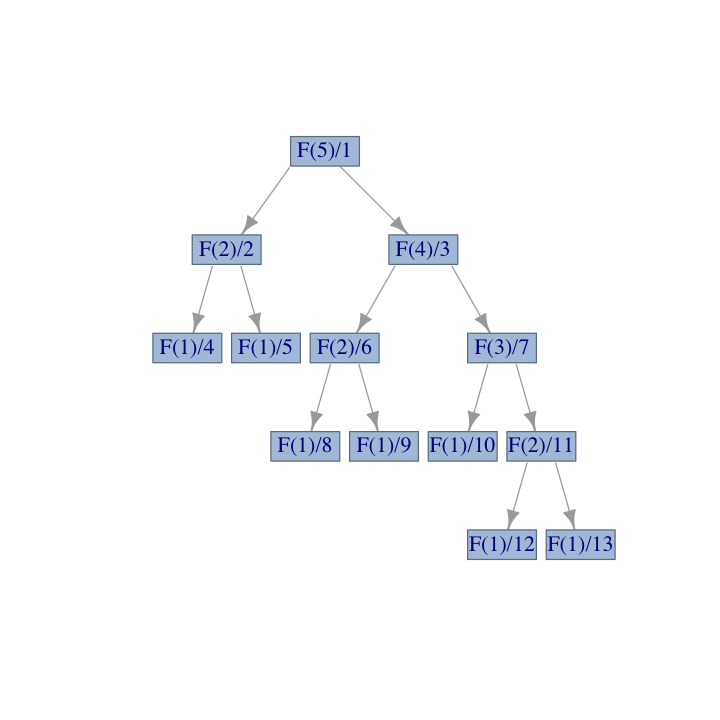

In [128]:
options(repr.plot.width=6,repr.plot.height=6)
edges1 <- c('F(5)/1','F(2)/2', 'F(5)/1','F(4)/3', 
            'F(2)/2','F(1)/4', 'F(2)/2','F(1)/5',
            'F(4)/3','F(2)/6', 'F(4)/3','F(3)/7',
            'F(2)/6','F(1)/8', 'F(2)/6','F(1)/9',
            'F(3)/7','F(1)/10', 'F(3)/7','F(2)/11',
            'F(2)/11','F(1)/12', 'F(2)/11','F(1)/13')

g1 <- graph(edges1)

plot(g1,layout=layout_as_tree(g1),
     vertex.color="lightsteelblue",
     vertex.size=35,vertex.label.cex=1.1,
     vertex.frame.color="slategray",vertex.shape='rectangle')

In [112]:
answer_dictionary[11] <- toString(c)

## 12.
В терминологии сетей TCP/IP маской сети называется двоичное число, определяющее, 

- какая часть IP-адреса узла сети относится к адресу сети, 
- а какая — к адресу самого узла в этой сети. 

Обычно маска записывается по тем же правилам, что и IP-адрес. 

Адрес сети получается в результате применения поразрядной конъюнкции к заданному IP-адресу узла и маске.

По заданным IP-адресу узла и маске определите адрес сети.

IP-адрес узла: `251.137.219.94`

Маска: `255.255.248.0`

При записи ответа выберите из приведённых в таблице чисел четыре элемента IP-адреса и 

запишите в нужном порядке соответствующие им буквы. Точки `.` писать не нужно.

---

In the terminology of TCP / IP networks, a network mask is a binary number that 

- specifies what part of the IP address of the node refers to the network address, 
- and which one to the host address in that network.

Usually, the mask is written using the same rules as the IP address. 

The network address is obtained as a result of applying the bitwise conjunction to the specified node IP address and the mask.

From the given IP-address of the node and the mask, determine the network address.

The IP address is `251.137.219.94`

The mask is: `255.255.248.0`

For recording an answer, select from the numbers in the table four IP address elements and 

write down the corresponding letters in the desired order. Points `.` do not need to be written.

| A | B | C | D | E | F | G | H |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 0 | 94 | 137 | 216 | 219 | 248 | 251 | 255 |

_Пример_.

Пусть искомый IP-адрес `192.168.128.0`, и дана таблица

---

_Example_. 

The desired IP-address is `192.168.128.0`, and the table is given:

| A | B | C | D | E | F | G | H |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 128 | 168 | 255 | 8 | 127 | 0 | 17 | 192 |

В этом случае правильный ответ будет записан в виде: `HBAF`.

---

In this case, the correct answer will be written in the form: `HBAF`.

In [129]:
dec2bin <- function(n) {
  if (n == 0) {
      bv <- '0'
  } else {
      bv <- rep(0, 1 + floor(log(n, 2)))
      while (n >= 2) {
          pow <- floor(log(n, 2))
          bv[1 + pow] <- 1
          n <- n - 2^pow
      }
      bv[1] <- n %% 2
      paste(rev(bv), collapse = "")
  }
}

Переведем IP-адрес узла и маску в бинарную форму.

Let's write the IP-address of the node and the mask into a binary form.

In [130]:
ip <- unlist(strsplit('251.137.219.94','[.]'))
mask <- unlist(strsplit('255.255.248.0','[.]'))

ip_bin <- ''
mask_bin <- '' 

for (i in 1:4) {
    ip_bin_cur <- dec2bin(as.integer(ip[i]))
    if (nchar(ip_bin_cur) < 8) {
        for (k in 1:(8 - nchar(ip_bin_cur))) {
           ip_bin_cur <- paste('0',ip_bin_cur,sep='') 
        }
    }

    mask_bin_cur <- dec2bin(as.integer(mask[i]))
    if (nchar(mask_bin_cur) < 8) {
        for (k in 1:(8 - nchar(mask_bin_cur))) {
           mask_bin_cur <- paste('0',mask_bin_cur,sep='') 
        }
    }
    
    ip_bin <- paste(ip_bin,ip_bin_cur,sep='.')
    mask_bin <- paste(mask_bin,mask_bin_cur,sep='.')

}

ip_bin <- substr(ip_bin,2,nchar(ip_bin))
mask_bin <- substr(mask_bin,2,nchar(mask_bin))

In [131]:
ip_bin; mask_bin

[1] "11111011.10001001.11011011.01011110"

[1] "11111111.11111111.11111000.00000000"

Теперь можно применить поразрядную коньюнкцию.

Now it is possible to apply bitwise conjunctions.

In [133]:
ip_bin <- unlist(strsplit(ip_bin,''))
mask_bin <- unlist(strsplit(mask_bin,''))

net_bin <-''
for (i in 1:35){
    if (mask_bin[i] == '.'){
        net_bin <- paste(net_bin,'.',sep='')
    } else {
        symbol <- toString(as.integer(as.integer(mask_bin[i]) & as.integer(ip_bin[i])))
        net_bin <- paste(net_bin,symbol,sep='')
    }
}

net_bin

[1] "11111011.10001001.11011000.00000000"

In [134]:
net <- ''
for (el in unlist(strsplit(net_bin,'[.]'))) {
    net <- paste(net,toString(bin2dec(el)),sep='.')
}
net <- substr(net,2,nchar(net))

net

[1] "251.137.216.0"

При замене на буквенные обозначения получается:

With replacing the address parts by the letters we get:

In [135]:
string <- unlist(strsplit(net,'[.]'))
codes <- c('0','94','137','216','219','248','251','255')
symbols <- c('A','B','C','D','E','F','G','H')
result <- ''

for (el in string) {
    for (i in 1:8) {
        if (el == codes[i]) {
            result <- paste(result,symbols[i],sep='')
        }
    }
}

result

[1] "GCDA"

In [136]:
answer_dictionary[12] <- result

## Ответы &nbsp; &nbsp; &nbsp; Answers

In [137]:
answer_dictionary

<hash> containing 12 key-value pair(s).
  1 : 2
  10 : 1956
  11 : 13
  12 : GCDA
  2 : 5
  3 : 9
  4 : 1
  5 : D0
  6 : D
  7 : 6
  8 : 17
  9 : 15